In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import seaborn
import json


# Import API key
from Config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy as cp

# Output File (CSV)
output_data_file = "/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [2]:
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


In [3]:
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(500)

In [4]:
samplecity.head()

,city,country
3121,sakhon nakhon,th
5020,emirdag,tr
1594,altamira,br
4041,ormond beach,us
1064,mufumbwe,zm


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")

No data for this city: sakhon nakhon
This is city#: 1
This is: sakhon nakhon
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=sakhon nakhon
This is city#: 2
This is: emirdag
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=emirdag


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.6/site-packages/ipykernel_l

This is city#: 3
This is: altamira
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=altamira
This is city#: 4
This is: ormond beach
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=ormond beach
This is city#: 5
This is: mufumbwe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=mufumbwe
This is city#: 6
This is: ortakoy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=ortakoy
This is city#: 7
This is: mason city
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=mason city
This is city#: 8
This is: den chai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e1

This is city#: 51
This is: glasgow
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=glasgow
This is city#: 52
This is: hinton
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=hinton
This is city#: 53
This is: mombasa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=mombasa
This is city#: 54
This is: statesville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=statesville
This is city#: 55
This is: kolondieba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=kolondieba
This is city#: 56
This is: chisec
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc

This is city#: 98
This is: red bluff
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=red bluff
This is city#: 99
This is: galeana
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=galeana
This is city#: 100
This is: kilindoni
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=kilindoni
This is city#: 101
This is: seddon
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=seddon
This is city#: 102
This is: pueblo nuevo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=pueblo nuevo
This is city#: 103
This is: ahero
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=90

This is city#: 144
This is: eganville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=eganville
This is city#: 145
This is: el carrizo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=el carrizo
This is city#: 146
This is: tabora
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=tabora
This is city#: 147
This is: bure
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=bure
This is city#: 148
This is: birnin kebbi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=birnin kebbi
This is city#: 149
This is: skibotn
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=90

This is city#: 192
This is: bara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=bara
This is city#: 193
This is: jalu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=jalu
This is city#: 194
This is: sitrah
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=sitrah
This is city#: 195
This is: auka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=auka
This is city#: 196
This is: bonito
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=bonito
No data for this city: kamenskoye
This is city#: 197
This is: kamenskoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid

This is city#: 238
This is: abbeville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=abbeville
This is city#: 239
This is: rockport
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=rockport
This is city#: 240
This is: srirampur
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=srirampur
This is city#: 241
This is: wisconsin rapids
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=wisconsin rapids
This is city#: 242
This is: telde
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=telde
No data for this city: gurupa
This is city#: 243
This is: gurupa
This is the requested URL: http://api.ope

This is city#: 285
This is: conceicao da barra
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=conceicao da barra
This is city#: 286
This is: karatuzskoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=karatuzskoye
This is city#: 287
This is: mahudha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=mahudha
This is city#: 288
This is: rumoi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=rumoi
This is city#: 289
This is: araguaina
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=araguaina
This is city#: 290
This is: caohai
This is the requested URL: http://api.openweathermap.org/data/2

This is city#: 331
This is: terme
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=terme
This is city#: 332
This is: ende
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=ende
This is city#: 333
This is: kapaa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=kapaa
This is city#: 334
This is: orocue
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=orocue
This is city#: 335
This is: pompeu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=pompeu
This is city#: 336
This is: linqing
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc

This is city#: 377
This is: temir
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=temir
This is city#: 378
This is: garh maharaja
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=garh maharaja
This is city#: 379
This is: boyuibe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=boyuibe
This is city#: 380
This is: sigulda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=sigulda
This is city#: 381
This is: chirongui
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=chirongui
This is city#: 382
This is: cubara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900

This is city#: 423
This is: yining
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=yining
This is city#: 424
This is: easton
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=easton
This is city#: 425
This is: svetlaya
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=svetlaya
This is city#: 426
This is: navirai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=navirai
This is city#: 427
This is: poway
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=poway
No data for this city: meilu
This is city#: 428
This is: meilu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather

This is city#: 470
This is: nayagarh
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=nayagarh
This is city#: 471
This is: camacupa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=camacupa
This is city#: 472
This is: pontal do parana
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=pontal do parana
This is city#: 473
This is: bullhead city
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=bullhead city
This is city#: 474
This is: boo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=900e168dc94d80b1ac886801a0b29dfc&units=Imperial&q=boo
This is city#: 475
This is: energetik
This is the requested URL: http://api.openweathermap.org/data/2.5/

In [9]:
samplecity = samplecity[samplecity.latitude != ""]
samplecity

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
5020,emirdag,tr,39,39,29,90,0,2
1594,altamira,br,-3,-3,91,55,75,10
4041,ormond beach,us,29,29,81,57,40,12
1064,mufumbwe,zm,-13,-13,71,77,68,12
5021,ortakoy,tr,38,38,42,81,75,1
5449,mason city,us,43,43,32,100,90,18
3181,den chai,th,17,17,66,97,0,2
6570,hanna,ca,51,51,20,81,56,4
1694,voi,ke,-3,-3,69,90,76,4
4610,tahlequah,us,35,35,63,34,1,5


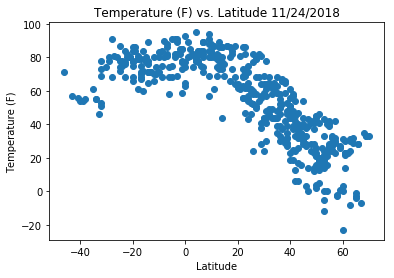

In [11]:
#date = datetime.date.today()
import time
date = time.strftime("%m/%d/%Y")
#print(date)
plt.scatter(samplecity['latitude'],samplecity['temperature'])
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.show()


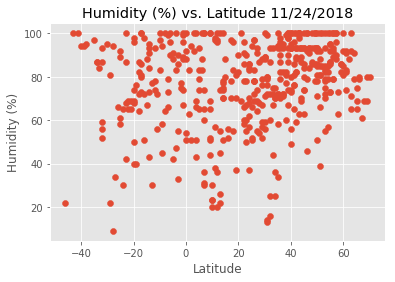

In [12]:
plt.scatter(samplecity['latitude'], samplecity['humidity'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

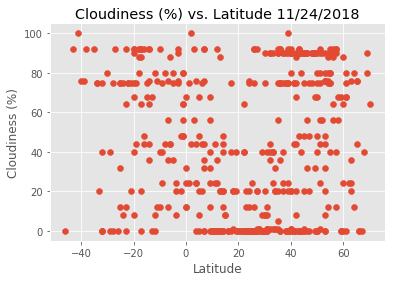

In [13]:
# plt.scatter(latitude,cloudy)
plt.scatter(samplecity['latitude'], samplecity['cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.show()


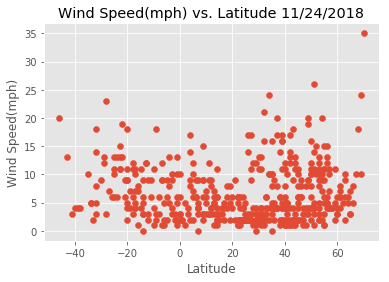

In [14]:
# plt.scatter(latitude,windspeed)
plt.scatter(samplecity['latitude'], samplecity['wind_speed'])
plt.title(f"Wind Speed(mph) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")
plt.show()


In [15]:
#Make into CSV
samplecity.to_csv("sampleweather.csv", encoding="utf-8", index=False)
df = pd.read_csv("sampleweather.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,emirdag,tr,39,39,29,90,0,2
1,altamira,br,-3,-3,91,55,75,10
2,ormond beach,us,29,29,81,57,40,12
3,mufumbwe,zm,-13,-13,71,77,68,12
4,ortakoy,tr,38,38,42,81,75,1
